In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight")

In [2]:
class perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        # Initialize Perceptron with small random weights
        self.weights = np.random.randn(3) * 1e-4 
        # Check if training parameters are provided and print initial weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before trining: \n {self.weights}")
        # Set learning rate (eta) and number of epochs
        self.eta = eta
        self.epochs = epochs

    def _z_outcome(self, inputs, weights):
        # Calculate the weighted sum of inputs
        return np.dot(inputs, weights)
        
    def activation_function(self, z):
        # Apply activation function (binary step function)
        return np.where(z > 0, 1, 0) 

    def fit(self, X, y):
        # Store input data and target labels
        self.X = X
        self.y = y

        # Add a bias column to input data
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")

        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)

            # Calculate the weighted sum and apply the activation function
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")

            # Calculate the prediction error
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")

            # Update the weights using the error and learning rate
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            

    def predict(self, X):
        # Add a bias column to input data and make predictions
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)

    def total_loss(self):
        # Calculate and print the total loss (sum of errors)
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss

    def _create_dir_return_path(self, model_dir, filename):
        # Create a directory and return the path
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)

    def save(self, filename, model_dir= None):
        if model_dir is not None:
            # If a model directory is specified, save the model there
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            # Otherwise, save the model in the "model" directory
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)

    def load(self, filepath):
        # Load a saved model from the specified file path (not defined in the code)
        return joblib.load(filepath)

In [3]:
def prepare_data(df,target_col="y"):
    X = df.drop(target_col, axis= 1)

    y = df[target_col]
    return X, y

In [4]:
# Define a dictionary representing the AND gate truth table.
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1]
}
df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X, y = prepare_data(df_AND)

# Set the learning rate (ETA), which controls the step size in adjusting weights during training.
ETA = 0.1 # 0 AND 1

# Set the number of training epochs (iterations through the data)
EPOCHS = 10

# Create a Perceptron model for the AND gate with the specified learning rate and epochs.
model_and = perceptron(eta=ETA, epochs=EPOCHS)

# Fit (train) the model with the input features (X) and target labels (y) using the defined learning rate and epochs.
model_and.fit(X,y)

# Calculate and display the total loss for the trained model.
_ = model_and.total_loss()

initial weights before trining: 
 [ 8.13461069e-05 -8.18871912e-05  6.59872231e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[0 0 1 0]
error: 
0    0
1    0
2   -1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[8.13461069e-05 9.99181128e-02 6.59872231e-05]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-9.99186539e-02 -8.18871912e-05  2.00065987e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[8.13461069e-05 9.99181128e-02 1.00065987e-01]
####################
--------------------
for epoch >> 3
----

In [6]:
model_and.save(filename="and.model")

In [7]:
reload_model_and = perceptron().load(filepath = "model/and.model")

In [8]:
reload_model_and.predict(X=[[1,1]])

array([1])

# OR gate

In [9]:
 # Define a dictionary representing the OR gate truth table.
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1]
}
df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [10]:
X, y = prepare_data(df_OR)

# Set the learning rate (ETA), which controls the step size in adjusting weights during training.
ETA = 0.1 # 0 AND 1

# Set the number of training epochs (iterations through the data)
EPOCHS = 10

# Create a Perceptron model for the OR gate with the specified learning rate and epochs.
model_or = perceptron(eta=ETA, epochs=EPOCHS)

# Fit (train) the model with the input features (X) and target labels (y) using the defined learning rate and epochs.
model_or.fit(X,y)

# Calculate and display the total loss for the trained model.
_ = model_or.total_loss()

initial weights before trining: 
 [ 3.02360696e-05  8.30725770e-05 -1.24035746e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[3.02360696e-05 8.30725770e-05 9.98759643e-02]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.20003024  0.20008307 -0.20012404]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.20003024  0.20008307 -0.10012404]
####################
--------------------
for epoch >> 3
--------------------
pred

In [11]:
model_or.save(filename="or.model",model_dir="model_or")

In [12]:
# reload_model_and = perceptron().load(filepath = "model/and.model")

# XOR gate

In [13]:
 # Define a dictionary representing the OR gate truth table.
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0]
}
df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [14]:
X, y = prepare_data(df_XOR)

# Set the learning rate (ETA), which controls the step size in adjusting weights during training.
ETA = 0.1 # 0 AND 1

# Set the number of training epochs (iterations through the data)
EPOCHS = 10

# Create a Perceptron model for the OR gate with the specified learning rate and epochs.
model_xor = perceptron(eta=ETA, epochs=EPOCHS)

# Fit (train) the model with the input features (X) and target labels (y) using the defined learning rate and epochs.
model_xor.fit(X,y)

# Calculate and display the total loss for the trained model.
_ = model_xor.total_loss()

initial weights before trining: 
 [-9.91683146e-05  4.00567430e-06 -4.28588312e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
[1 1 0 0]
error: 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 9.99008317e-02  4.00567430e-06 -4.28588312e-05]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-9.91683146e-05 -9.99959943e-02  1.99957141e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 9.99008317e-02  4.00567430e-06 -4.28588312e-05]
####################
--------------------
for epoch >> 

In [15]:
from matplotlib.colors import ListedColormap

In [16]:
def save_plot(df, model, filename="plot.png", plot_dir = "plot"):
    def _create_base_plot(df):
        df.plot(kind= "scatter" , x = "x1", y = "x2", c = "y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle= "--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle= "--", linewidth=1)

        figure = plt.gcf()
        figure.set_size_inches(10,8)
        
    def _plot_decision_regions(X, y, classifier, resolution = 0.02):
        colors = ['cyan', "lightgreen"]
        cmap = ListedColormap(colors)
        X = X.values
        x1 = X[:, 0]
        x2 = X[:, 1]

        x1_min, x1_max = x1.min() - 1, x1.max() + 1
        x2_min, x2_max = x2.min() - 1, x2.max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1, xx2, y_hat, alpha = 0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        plt.plot()
    X, y = prepare_data(df)

    _create_base_plot(df)
    _plot_decision_regions(X, y, model)

    os.makedirs(plot_dir, exist_ok = True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

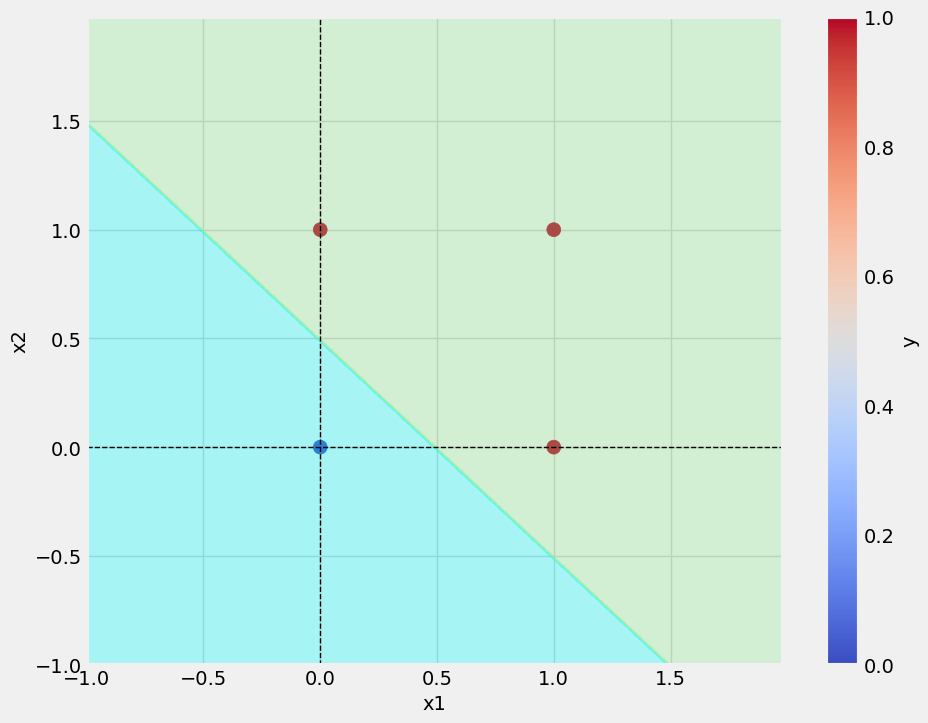

In [17]:
save_plot(df_OR, model_or, filename="or.png")